In [13]:
import os
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [16]:
len(y_train)

60000

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [19]:
len(y_test)

10000

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

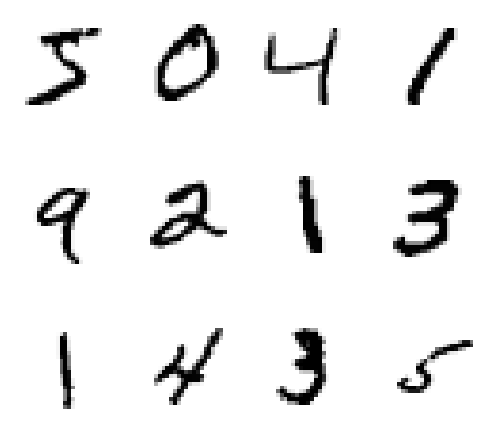

In [21]:
plt.figure(figsize = (5,5))
for k in range(12):
    plt.subplot(3, 4, k + 1)
    plt.imshow(X_train[k], cmap = 'Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
# X_train = X_train.reshape(60000, 28 * 28).astype('float32')
# X_test = X_test.reshape(10000, 28 * 28).astype('float32')

X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [23]:
X_train /= 255
X_test /= 255

In [24]:
# n_classes = 10
# model = Sequential()
# model.add(Dense(512, activation='relu', input_dim = 28 * 28))
# model.add(Dense(n_classes, activation='softmax'))
# model.summary()

n_classes = 10
inputs = Input(shape = (28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(n_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs = outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
history = model.fit(X_train, y_train,
                    epochs = 200,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8273 - loss: 0.6034 - val_accuracy: 0.9794 - val_loss: 0.0697
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9787 - loss: 0.0682 - val_accuracy: 0.9799 - val_loss: 0.0661
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9863 - loss: 0.0420 - val_accuracy: 0.9843 - val_loss: 0.0515
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9902 - loss: 0.0310 - val_accuracy: 0.9883 - val_loss: 0.0416
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9880 - val_loss: 0.0395
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9930 - loss: 0.0206 - val_accuracy: 0.9891 - val_loss: 0.0370
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9941 - loss: 0.0168 - val_accuracy: 0.9887 - val_loss: 0.0420
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9963 - loss: 0.0123 - 

In [27]:
history.history

{'accuracy': [0.9245833158493042,
  0.9805833101272583,
  0.9863958358764648,
  0.9898750185966492,
  0.992437481880188,
  0.9929375052452087,
  0.9940833449363708,
  0.9957291483879089,
  0.9958124756813049,
  0.9965416789054871,
  0.9971666932106018,
  0.9972500205039978,
  0.9973124861717224,
  0.9982708096504211,
  0.9979166388511658,
  0.9988958239555359,
  0.9974791407585144,
  0.9984791874885559,
  0.9984375238418579,
  0.9993333220481873,
  0.9985416531562805,
  0.9990833401679993,
  0.9994999766349792,
  0.9984166622161865,
  0.9989374876022339,
  0.999875009059906,
  0.9999791383743286,
  0.999875009059906,
  0.9976458549499512,
  0.9992083311080933,
  0.9994791746139526,
  0.9984999895095825,
  0.9993958473205566,
  0.9997291564941406,
  0.999750018119812,
  0.9984791874885559,
  0.9989166855812073,
  0.9993749856948853,
  0.99979168176651,
  0.9999791383743286,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  

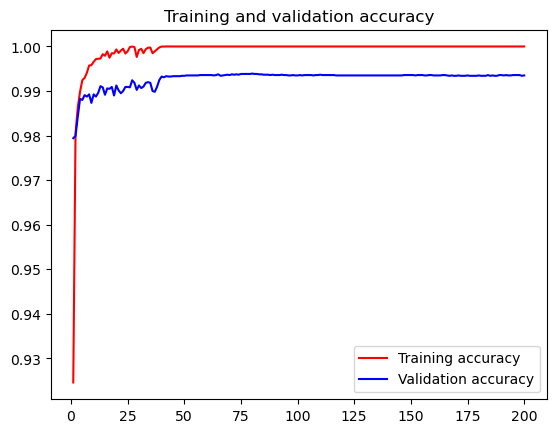

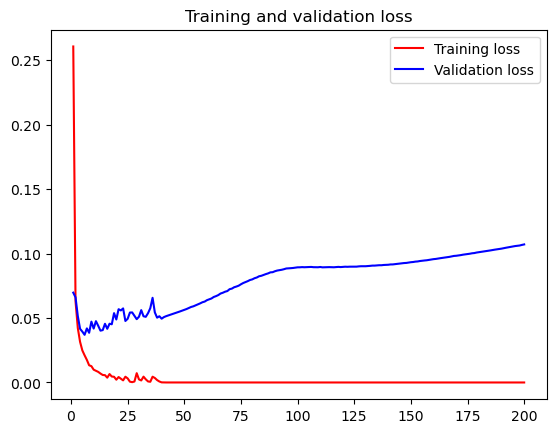

In [28]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label = "Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [29]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [30]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 1.2347605e-37, 3.7357173e-30,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 3.1473470e-32], dtype=float32)

In [31]:
predictions[0].argmax()

7

In [32]:
y_test[0]

7

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9918 - loss: 0.1088


In [34]:
test_acc, test_loss

(0.9934999942779541, 0.08575639128684998)

In [35]:
print(f"test_acc: {test_loss}")

test_acc: 0.08575639128684998
